In [68]:
import numpy
import pandas
import datetime
import statistics
import matplotlib.pyplot as pyplot
import matplotlib.dates as mdates

from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [69]:
## LENDO BANCO DE DADOS DO EXCEL

In [70]:
data_covid19_BR = pandas.read_excel("C:\\Users\\engoliveira\\PYTHON\\DADOS_COVID19.xlsx", sheet_name = 'BRASIL')
data_covid19_BA = pandas.read_excel("C:\\Users\\engoliveira\\PYTHON\\DADOS_COVID19.xlsx", sheet_name = 'BAHIA')

In [71]:
data_covid19_BR.head(5)

,DATA_CASOS_BR,CASOS_CONFIRMADOS_BR,DATA_MORTES_BR,MORTES_CONFIRMADAS_BR,DAILY_NEW_CASES_BR,DAILY_NEW_MORTES_BR
0,2020-02-26,1,2020-03-17,1.0,1,1.0
1,2020-02-27,1,2020-03-18,4.0,0,3.0
2,2020-02-28,1,2020-03-19,6.0,0,2.0
3,2020-02-29,2,2020-03-20,11.0,1,5.0
4,2020-03-01,2,2020-03-21,18.0,0,7.0


In [72]:
data_covid19_BA.head(5)

,DATA_CASOS_BA,CASOS_CONFIRMADOS_BA,DATA_MORTES_BA,MORTES_CONFIRMADAS_BA,DAILY_NEW_CASES_BA,DAILY_NEW_MORTES_BA
0,2020-03-06,1,2020-03-29,1.0,1,1.0
1,2020-03-07,2,2020-03-30,2.0,1,1.0
2,2020-03-08,2,2020-03-31,2.0,0,0.0
3,2020-03-09,2,2020-04-01,2.0,0,0.0
4,2020-03-10,2,2020-04-02,3.0,0,1.0


In [73]:
# AGRUPANDO DADOS EM LISTAS ----------------------------------------------------------------------------------------

In [74]:
# BRASIL --------------------------------------------------------------------------------------------
data_cases_BR   = list(data_covid19_BR["DATA_CASOS_BR"].dropna())
data_mortes_BR  = list(data_covid19_BR["DATA_MORTES_BR"].dropna())
daily_cases_BR  = list(data_covid19_BR["DAILY_NEW_CASES_BR"].dropna().astype(int))
daily_mortes_BR = list(data_covid19_BR["DAILY_NEW_MORTES_BR"].dropna().astype(int))
infec_BR        = list(data_covid19_BR["CASOS_CONFIRMADOS_BR"].dropna().astype(int))
death_BR        = list(data_covid19_BR["MORTES_CONFIRMADAS_BR"].dropna().astype(int))
# BAHIA --------------------------------------------------------------------------------------------
data_cases_BA   = list(data_covid19_BA["DATA_CASOS_BA"].dropna())
data_mortes_BA  = list(data_covid19_BA["DATA_MORTES_BA"].dropna())
daily_cases_BA  = list(data_covid19_BA["DAILY_NEW_CASES_BA"].dropna().astype(int))
daily_mortes_BA = list(data_covid19_BA["DAILY_NEW_MORTES_BA"].dropna().astype(int))
infec_BA        = list(data_covid19_BA["CASOS_CONFIRMADOS_BA"].dropna().astype(int))
death_BA        = list(data_covid19_BA["MORTES_CONFIRMADAS_BA"].dropna().astype(int))

In [75]:
# TRANSFORMANDO DADOS EM VETORES

In [76]:
# BRASIL
time_dados_cases_BR   = numpy.ceil(numpy.linspace(0,len(data_cases_BR),len(data_cases_BR)))
time_dados_mortes_BR  = numpy.ceil(numpy.linspace(0,len(data_mortes_BR),len(data_mortes_BR)))
infec_dados_BR        = numpy.array(infec_BR).astype(int)
death_dados_BR        = numpy.array(death_BR).astype(int)
# BAHIA
time_dados_cases_BA   = numpy.ceil(numpy.linspace(0,len(data_cases_BA ),len(data_cases_BA )))
time_dados_mortes_BA  = numpy.ceil(numpy.linspace(0,len(data_mortes_BA ),len(data_mortes_BA )))
infec_dados_BA        = numpy.array(infec_BA).astype(int)
death_dados_BA        = numpy.array(death_BA).astype(int)

In [77]:
## MODELO 1 BRASIL ----------------------------------------------------------------------

In [155]:
def model_cases1_BR(x,c1,c2):
    return(c1*numpy.exp(c2*x))

popt,pcov = curve_fit(model_cases1_BR,time_dados_cases_BR,infec_dados_BR, p0 = [0.5,0.5])
c1,c2 = popt
print(popt)

def model_mortes1_BR(x,m1,m2):
    return(m1*numpy.exp(m2*x))

popt,pcov = curve_fit(model_mortes1_BR,time_dados_mortes_BR,death_dados_BR, p0 = [0.5,0.5])
m1,m2 = popt
print(popt)

days = 2
days_forward = []
infec_cases1_BR = []
death_cases1_BR = []

time_data_cases1_BR  = data_covid19_BR["DATA_CASOS_BR"].dropna()
time_data_mortes1_BR = data_covid19_BR["DATA_MORTES_BR"].dropna()

for i in range(days):
    day_forward = datetime.date.today() + datetime.timedelta(days=i+1)
    days_forward.append(day_forward)

for i in range(days):
    time_data_cases1_BR = time_data_cases1_BR.append(pandas.DataFrame([pandas.Timestamp(days_forward[i])]),
                          ignore_index=True);
    time_data_mortes1_BR = time_data_mortes1_BR.append(pandas.DataFrame([pandas.Timestamp(days_forward[i])]),
                           ignore_index=True);

for i in range(days):
    est_cases1_BR = model_cases1_BR(len(data_cases_BR)+i+1,c1,c2); 
    print("Estimativa do Modelo de Casos  (Exponencial Pura): %.i" %(est_cases1_BR.astype(int)),days_forward[i])
    est_mortes1_BR = model_mortes1_BR(len(data_mortes_BR)+i+1,m1,m2)
    print("Estimativa do Modelo de Mortes (Exponencial Pura):   %.i" %(est_mortes1_BR.astype(int)),days_forward[i])

for i in range(len(time_dados_cases_BR)):
    I1 = model_cases1_BR(time_dados_cases_BR[i],c1,c2)
    infec_cases1_BR.append(I1)

for i in range(len(time_dados_mortes_BR)):
    I2 = model_mortes1_BR(time_dados_mortes_BR[i],m1,m2)
    death_cases1_BR.append(I2)

for i in range(days):
    est_cases1_BR = model_cases1_BR(len(data_cases_BR)+i+1,c1,c2)
    est_mortes1_BR = model_mortes1_BR(len(data_mortes_BR)+i+1,m1,m2)
    infec_cases1_BR.append(est_cases1_BR)
    death_cases1_BR.append(est_mortes1_BR)

new_time_data_cases1_BR    = list(time_data_cases1_BR[0])
new_time_data_mortes1_BR   = list(time_data_mortes1_BR[0])
new_infec_dados1_BR        = list(infec_dados_BR)
new_death_dados1_BR        = list(death_dados_BR)

print(len(new_time_data_cases1_BR))
print(len(new_time_data_mortes1_BR))

for i in range(days):
    new_infec_dados1_BR.append(infec_cases1_BR[i-2].astype(int))
    new_death_dados1_BR.append(death_cases1_BR[i-2].astype(int))

[5.85898243e+02 7.62392390e-02]
[1.35374135e+02 8.30993898e-02]
Estimativa do Modelo de Casos  (Exponencial Pura): 121770 2020-05-06
Estimativa do Modelo de Mortes (Exponencial Pura):   8630 2020-05-06
Estimativa do Modelo de Casos  (Exponencial Pura): 131417 2020-05-07
Estimativa do Modelo de Mortes (Exponencial Pura):   9377 2020-05-07
71
51


In [79]:
## MODELO 2 BRASIL -----------------------------------------------------------------------------------------------

In [80]:
def model_cases2_BR(x,c1,c2,c3):
    return(c1*numpy.exp(-c2*numpy.exp(-c3*x)))

popt,pcov = curve_fit(model_cases2_BR,time_dados_cases_BR,infec_dados_BR, p0 = [0.5,0.5,0.5])
c1,c2,c3 = popt
print(popt)

def model_mortes2_BR(x,m1,m2,m3):
    return(m1*numpy.exp(-m2*numpy.exp(-m3*x)))

popt,pcov = curve_fit(model_mortes2_BR,time_dados_mortes_BR,death_dados_BR, p0 = [1.5,3.5,0.5])
m1,m2,m3 = popt
print(popt)

days = 2
days_forward = []
infec_cases2_BR = []
death_cases2_BR = []

time_data_cases2_BR  = data_covid19_BR["DATA_CASOS_BR"].dropna()
time_data_mortes2_BR = data_covid19_BR["DATA_MORTES_BR"].dropna()

for i in range(days):
    day_forward = datetime.date.today() + datetime.timedelta(days=i+1)
    days_forward.append(day_forward)

for i in range(days):
    time_data_cases2_BR = time_data_cases2_BR.append(pandas.DataFrame([pandas.Timestamp(days_forward[i])]),
                          ignore_index=True);
    time_data_mortes2_BR = time_data_mortes2_BR.append(pandas.DataFrame([pandas.Timestamp(days_forward[i])]),
                           ignore_index=True);

for i in range(days):
    est_cases2_BR = model_cases2_BR(len(data_cases_BR)+i+1,c1,c2,c3)
    print("Estimativa do Modelo de Casos (Curva de Gompertz): %.i" %(est_cases2_BR.astype(int)),days_forward[i])
    est_mortes2_BR = model_mortes2_BR(len(data_mortes_BR)+i+1,m1,m2,m3)
    print("Estimativa do Modelo de Mortes (Curva de Gompertz):  %.i" %(est_mortes2_BR.astype(int)),days_forward[i])

for i in range(len(time_dados_cases_BR)):
    I1 = model_cases2_BR(time_dados_cases_BR[i],c1,c2,c3)
    infec_cases2_BR.append(I1)

for i in range(len(time_dados_mortes_BR)):
    I2 = model_mortes2_BR(time_dados_mortes_BR[i],m1,m2,m3)
    death_cases2_BR.append(I2)

for i in range(days):
    est_cases2_BR = model_cases2_BR(len(data_cases_BR)+i+1,c1,c2,c3)
    est_mortes2_BR = model_mortes2_BR(len(data_mortes_BR)+i+1,m1,m2,m3)
    infec_cases2_BR.append(est_cases2_BR)
    death_cases2_BR.append(est_mortes2_BR)

new_time_data_cases2_BR    = list(time_data_cases2_BR[0])
new_time_data_mortes2_BR   = list(time_data_mortes2_BR[0])
new_infec_dados2_BR        = list(infec_dados_BR)
new_death_dados2_BR        = list(death_dados_BR)

for i in range(days):
    new_infec_dados2_BR.append(infec_cases2_BR[i-2].astype(int))
    new_death_dados2_BR.append(death_cases2_BR[i-2].astype(int))

[4.71562740e+06 1.16747521e+01 1.63555958e-02]
[7.81824433e+04 8.48427037e+00 2.62379425e-02]
Estimativa do Modelo de Casos (Curva de Gompertz): 114783 2020-05-06
Estimativa do Modelo de Mortes (Curva de Gompertz):  7957 2020-05-06
Estimativa do Modelo de Casos (Curva de Gompertz): 121915 2020-05-07
Estimativa do Modelo de Mortes (Curva de Gompertz):  8442 2020-05-07


In [81]:
# COMPILANDO ESTÁTISTICAS DE COMPARAÇÃO DO MODELO ----------------------------------------------------------------

In [82]:
def statistics_models_BR(x):
    
    global start_deletion    
    start_deletion = -2
    
    adjust_infec_cases1_BR = infec_cases1_BR.copy()
    adjust_infec_cases2_BR = infec_cases2_BR.copy()
    adjust_death_cases1_BR = death_cases1_BR.copy()
    adjust_death_cases2_BR = death_cases2_BR.copy()
    
    del(adjust_infec_cases1_BR[start_deletion:])
    del(adjust_infec_cases2_BR[start_deletion:])
    del(adjust_death_cases1_BR[start_deletion:])
    del(adjust_death_cases2_BR[start_deletion:])
    
    rmse_cases1_BR  = mean_squared_error(infec_dados_BR, adjust_infec_cases1_BR, squared=False)
    rmse_cases2_BR  = mean_squared_error(infec_dados_BR, adjust_infec_cases2_BR, squared=False)
    rmse_mortes1_BR = mean_squared_error(death_dados_BR, adjust_death_cases1_BR, squared=False)
    rmse_mortes2_BR = mean_squared_error(death_dados_BR, adjust_death_cases2_BR, squared=False)

    rC1_BR = r2_score(infec_dados_BR, adjust_infec_cases1_BR)
    rC2_BR = r2_score(infec_dados_BR, adjust_infec_cases2_BR)
    rM1_BR = r2_score(death_dados_BR, adjust_death_cases1_BR)
    rM2_BR = r2_score(death_dados_BR, adjust_death_cases2_BR)
    
    if(x==1):
        print(" RMSE_C1 = %.3f\tR²_C1 = %.4f\n RMSE_C2 = %.3f\tR²_C2 = %.4f" 
              %(rmse_cases1_BR,rC1_BR,rmse_cases2_BR,rC2_BR))
        print(" RMSE_M1 = %.3f\tR²_M1 = %.4f\n RMSE_M2 = %.3f\tR²_M2 = %.4f" 
              %(rmse_mortes1_BR,rM1_BR,rmse_mortes2_BR,rM2_BR))
    
    rmse_cases_BR = (rmse_cases1_BR,rmse_cases2_BR);
    rmse_morte_BR = (rmse_mortes1_BR,rmse_mortes2_BR);
    
    return(rmse_cases_BR,rmse_morte_BR)

In [83]:
rmse_cases_BR,rmse_morte_BR = statistics_models_BR(0); z_alpha = 1.96/2.0

In [84]:
## MODELO 1 BAHIA -----------------------------------------------------------------------------------------------

In [85]:
def model_cases1_BA(x,c1,c2):
    return(c1*numpy.exp(c2*x))

popt,pcov = curve_fit(model_cases1_BA,time_dados_cases_BA,infec_dados_BA, p0 = [0.5,0.5])
c1,c2 = popt
print(popt)

def model_mortes1_BA(x,m1,m2):
    return(m1*numpy.exp(m2*x))

popt,pcov = curve_fit(model_mortes1_BA,time_dados_mortes_BA,death_dados_BA, p0 = [0.5,0.5])
m1,m2 = popt
print(popt)

days = 2
days_forward = []
infec_cases1_BA = []
death_cases1_BA = []

time_data_cases1_BA  = data_covid19_BA["DATA_CASOS_BA"].dropna()
time_data_mortes1_BA = data_covid19_BA["DATA_MORTES_BA"].dropna()

for i in range(days):
    day_forward = datetime.date.today() + datetime.timedelta(days=i+1)
    days_forward.append(day_forward)

for i in range(days):
    time_data_cases1_BA = time_data_cases1_BA.append(pandas.DataFrame([pandas.Timestamp(days_forward[i])]),
                          ignore_index=True);
    time_data_mortes1_BA = time_data_mortes1_BA.append(pandas.DataFrame([pandas.Timestamp(days_forward[i])]),
                           ignore_index=True);

for i in range(days):
    est_cases1_BA = model_cases1_BA(len(data_cases_BA)+i+1,c1,c2); 
    print("Estimativa do Modelo de Casos  (Exponencial Pura): %.i" %(est_cases1_BA.astype(int)),days_forward[i])
    est_mortes1_BA = model_mortes1_BA(len(data_mortes_BA)+i+1,m1,m2)
    print("Estimativa do Modelo de Mortes (Exponencial Pura):  %.i" %(est_mortes1_BA.astype(int)),days_forward[i])

for i in range(len(time_dados_cases_BA)):
    I1 = model_cases1_BA(time_dados_cases_BA[i],c1,c2)
    infec_cases1_BA.append(I1)

for i in range(len(time_dados_mortes_BA)):
    I2 = model_mortes1_BA(time_dados_mortes_BA[i],m1,m2)
    death_cases1_BA.append(I2)

for i in range(days):
    est_cases1_BA  = model_cases1_BA(len(data_cases_BA)+i+1,c1,c2)
    est_mortes1_BA = model_mortes1_BA(len(data_mortes_BA)+i+1,m1,m2)
    infec_cases1_BA.append(est_cases1_BA)
    death_cases1_BA.append(est_mortes1_BA)

new_time_data_cases1_BA    = list(time_data_cases1_BA[0])
new_time_data_mortes1_BA   = list(time_data_mortes1_BA[0])
new_infec_dados1_BA        = list(infec_dados_BA)
new_death_dados1_BA        = list(death_dados_BA)

for i in range(days):
    new_infec_dados1_BA.append(infec_cases1_BA[i-2].astype(int))
    new_death_dados1_BA.append(death_cases1_BA[i-2].astype(int))

[37.68551304  0.07751024]
[6.52109599 0.08404908]
Estimativa do Modelo de Casos  (Exponencial Pura): 4261 2020-05-06
Estimativa do Modelo de Mortes (Exponencial Pura):  159 2020-05-06
Estimativa do Modelo de Casos  (Exponencial Pura): 4605 2020-05-07
Estimativa do Modelo de Mortes (Exponencial Pura):  172 2020-05-07


In [86]:
## MODELO 2 BAHIA -----------------------------------------------------------------------------------------------

In [87]:
def model_cases2_BA(x,c1,c2,c3):
    return(c1*numpy.exp(-c2*numpy.exp(-c3*x)))

popt,pcov = curve_fit(model_cases2_BA,time_dados_cases_BA,infec_dados_BA, p0 = [0.5,0.5,0.5])
c1,c2,c3 = popt
print(popt)

def model_mortes2_BA(x,m1,m2,m3):
    return(m1*numpy.exp(-m2*numpy.exp(-m3*x)))

popt,pcov = curve_fit(model_mortes2_BA,time_dados_mortes_BA,death_dados_BA, p0 = [1.5,1.5,1.5])
m1,m2,m3 = popt
print(popt)

days = 2
days_forward = []
infec_cases2_BA = []
death_cases2_BA = []

time_data_cases2_BA  = data_covid19_BA["DATA_CASOS_BA"].dropna()
time_data_mortes2_BA = data_covid19_BA["DATA_MORTES_BA"].dropna()

for i in range(days):
    day_forward = datetime.date.today() + datetime.timedelta(days=i+1)
    days_forward.append(day_forward)

for i in range(days):
    time_data_cases2_BA = time_data_cases2_BA.append(pandas.DataFrame([pandas.Timestamp(days_forward[i])]),
                          ignore_index=True);
    time_data_mortes2_BA = time_data_mortes2_BA.append(pandas.DataFrame([pandas.Timestamp(days_forward[i])]),
                           ignore_index=True);

for i in range(days):
    est_cases2_BA = model_cases2_BA(len(data_cases_BA)+i+1,c1,c2,c3)
    print("Estimativa do Modelo de Casos (Curva de Gompertz): %.i" %(est_cases2_BA.astype(int)),days_forward[i])
    est_mortes2_BA = model_mortes2_BA(len(data_mortes_BA)+i+1,m1,m2,m3)
    print("Estimativa do Modelo de Mortes (Curva de Gompertz): %.i" %(est_mortes2_BA.astype(int)),days_forward[i])

for i in range(len(time_dados_cases_BA)):
    I1 = model_cases2_BA(time_dados_cases_BA[i],c1,c2,c3)
    infec_cases2_BA.append(I1)

for i in range(len(time_dados_mortes_BA)):
    I2 = model_mortes2_BA(time_dados_mortes_BA[i],m1,m2,m3)
    death_cases2_BA.append(I2)

for i in range(days):
    est_cases2_BA  = model_cases2_BA(len(data_cases_BA)+i+1,c1,c2,c3)
    est_mortes2_BA = model_mortes2_BA(len(data_mortes_BA)+i+1,m1,m2,m3)
    infec_cases2_BA.append(est_cases2_BA)
    death_cases2_BA.append(est_mortes2_BA)

new_time_data_cases2_BA    = list(time_data_cases2_BA[0])
new_time_data_mortes2_BA   = list(time_data_mortes2_BA[0])
new_infec_dados2_BA        = list(infec_dados_BA)
new_death_dados2_BA        = list(death_dados_BA)

for i in range(days):
    new_infec_dados2_BA.append(infec_cases2_BA[i-2].astype(int))
    new_death_dados2_BA.append(death_cases2_BA[i-2].astype(int))

[9.54163417e+04 1.00932572e+01 1.89722065e-02]
[3.03451968e+03 6.86459901e+00 2.16873347e-02]
Estimativa do Modelo de Casos (Curva de Gompertz): 3997 2020-05-06
Estimativa do Modelo de Mortes (Curva de Gompertz): 149 2020-05-06
Estimativa do Modelo de Casos (Curva de Gompertz): 4242 2020-05-07
Estimativa do Modelo de Mortes (Curva de Gompertz): 159 2020-05-07


C:\Users\engoliveira\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\Users\engoliveira\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


In [88]:
# COMPILANDO ESTÁTISTICAS DE COMPARAÇÃO DO MODELO ----------------------------------------------------------------

In [89]:
def statistics_models_BA(x):
    
    global start_deletion    
    start_deletion = -2
    
    adjust_infec_cases1_BA = infec_cases1_BA.copy()
    adjust_infec_cases2_BA = infec_cases2_BA.copy()
    adjust_death_cases1_BA = death_cases1_BA.copy()
    adjust_death_cases2_BA = death_cases2_BA.copy()
    
    del(adjust_infec_cases1_BA[start_deletion:])
    del(adjust_infec_cases2_BA[start_deletion:])
    del(adjust_death_cases1_BA[start_deletion:])
    del(adjust_death_cases2_BA[start_deletion:])
    
    rmse_cases1_BA  = mean_squared_error(infec_dados_BA, adjust_infec_cases1_BA, squared=False)
    rmse_cases2_BA  = mean_squared_error(infec_dados_BA, adjust_infec_cases2_BA, squared=False)
    rmse_mortes1_BA = mean_squared_error(death_dados_BA, adjust_death_cases1_BA, squared=False)
    rmse_mortes2_BA = mean_squared_error(death_dados_BA, adjust_death_cases2_BA, squared=False)

    rC1_BA = r2_score(infec_dados_BA, adjust_infec_cases1_BA)
    rC2_BA = r2_score(infec_dados_BA, adjust_infec_cases2_BA)
    rM1_BA = r2_score(death_dados_BA, adjust_death_cases1_BA)
    rM2_BA = r2_score(death_dados_BA, adjust_death_cases2_BA)
    
    if(x==1):
        print(" RMSE_C1 = %.3f\tR²_C1 = %.4f\n RMSE_C2 = %.3f\tR²_C2 = %.4f" 
              %(rmse_cases1_BA,rC1_BA,rmse_cases2_BA,rC2_BA))
        print(" RMSE_M1 = %.3f\tR²_M1 = %.4f\n RMSE_M2 = %.3f\tR²_M2 = %.4f" 
              %(rmse_mortes1_BA,rM1_BA,rmse_mortes2_BA,rM2_BA))
    
    rmse_cases_BA = (rmse_cases1_BA,rmse_cases2_BA);
    rmse_morte_BA = (rmse_mortes1_BA,rmse_mortes2_BA);
    
    return(rmse_cases_BA,rmse_morte_BA)

In [90]:
rmse_cases_BA,rmse_morte_BA = statistics_models_BA(0); z_alpha = 1.96/2.0

In [91]:
# DEFININDO INTERVALO DE PREDIÇÃO BRASIL  --------------------------------------------------------------------------

In [92]:
def prediction_interval_BR():
    
    global start_prediction
    start_prediction = -3

    uper_cases_model_1_BR = []; lown_cases_model_1_BR = []; uper_cases_model_2_BR = []; lown_cases_model_2_BR = []
    uper_morte_model_1_BR = []; lown_morte_model_1_BR = []; uper_morte_model_2_BR = []; lown_morte_model_2_BR = []

    for i in range((len(infec_cases1_BR)+start_prediction),len(infec_cases1_BR)):   
        uper_cases_model_1_BR.append(infec_cases1_BR[i] + z_alpha*rmse_cases_BR[0])
        lown_cases_model_1_BR.append(infec_cases1_BR[i] - z_alpha*rmse_cases_BR[0])
        uper_cases_model_2_BR.append(infec_cases2_BR[i] + z_alpha*rmse_cases_BR[1])
        lown_cases_model_2_BR.append(infec_cases2_BR[i] - z_alpha*rmse_cases_BR[1])

    for i in range((len(death_cases1_BR)+start_prediction),len(death_cases1_BR)):   
        uper_morte_model_1_BR.append(death_cases1_BR[i] + z_alpha*rmse_morte_BR[0])
        lown_morte_model_1_BR.append(death_cases1_BR[i] - z_alpha*rmse_morte_BR[0])
        uper_morte_model_2_BR.append(death_cases2_BR[i] + z_alpha*rmse_morte_BR[1])
        lown_morte_model_2_BR.append(death_cases2_BR[i] - z_alpha*rmse_morte_BR[1]) 
        
    uper_cases_model_1_BR[0] = infec_BR[start_prediction+2]
    lown_cases_model_1_BR[0] = infec_BR[start_prediction+2]
    uper_cases_model_2_BR[0] = infec_BR[start_prediction+2]
    lown_cases_model_2_BR[0] = infec_BR[start_prediction+2]

    uper_morte_model_1_BR[0] = death_BR[start_prediction+2]
    lown_morte_model_1_BR[0] = death_BR[start_prediction+2]
    uper_morte_model_2_BR[0] = death_BR[start_prediction+2]
    lown_morte_model_2_BR[0] = death_BR[start_prediction+2]
    
    interval_cases_model_1_BR = numpy.ceil((uper_cases_model_1_BR,lown_cases_model_1_BR)).astype(int)
    interval_cases_model_2_BR = numpy.ceil((uper_cases_model_2_BR,lown_cases_model_2_BR)).astype(int)
    interval_morte_model_1_BR = numpy.ceil((uper_morte_model_1_BR,lown_morte_model_1_BR)).astype(int)
    interval_morte_model_2_BR = numpy.ceil((uper_morte_model_2_BR,lown_morte_model_2_BR)).astype(int)
    
    return(interval_cases_model_1_BR,interval_cases_model_2_BR,interval_morte_model_1_BR,interval_morte_model_2_BR)

In [93]:
interval_cases_model_1_BR,interval_cases_model_2_BR,interval_morte_model_1_BR,interval_morte_model_2_BR = prediction_interval_BR()

In [94]:
# DEFININDO INTERVALO DE PREDIÇÃO BAHIA  --------------------------------------------------------------------------

In [95]:
def prediction_interval_BA():
    
    global start_prediction
    start_prediction = -3

    uper_cases_model_1_BA = []; lown_cases_model_1_BA = []; uper_cases_model_2_BA = []; lown_cases_model_2_BA = []
    uper_morte_model_1_BA = []; lown_morte_model_1_BA = []; uper_morte_model_2_BA = []; lown_morte_model_2_BA = []

    for i in range((len(infec_cases1_BA)+start_prediction),len(infec_cases1_BA)):   
        uper_cases_model_1_BA.append(infec_cases1_BA[i] + z_alpha*rmse_cases_BA[0])
        lown_cases_model_1_BA.append(infec_cases1_BA[i] - z_alpha*rmse_cases_BA[0])
        uper_cases_model_2_BA.append(infec_cases2_BA[i] + z_alpha*rmse_cases_BA[1])
        lown_cases_model_2_BA.append(infec_cases2_BA[i] - z_alpha*rmse_cases_BA[1])

    for i in range((len(death_cases1_BA)+start_prediction),len(death_cases1_BA)):   
        uper_morte_model_1_BA.append(death_cases1_BA[i] + z_alpha*rmse_morte_BA[0])
        lown_morte_model_1_BA.append(death_cases1_BA[i] - z_alpha*rmse_morte_BA[0])
        uper_morte_model_2_BA.append(death_cases2_BA[i] + z_alpha*rmse_morte_BA[1])
        lown_morte_model_2_BA.append(death_cases2_BA[i] - z_alpha*rmse_morte_BA[1]) 
        
    uper_cases_model_1_BA[0] = infec_BA[start_prediction+2]
    lown_cases_model_1_BA[0] = infec_BA[start_prediction+2]
    uper_cases_model_2_BA[0] = infec_BA[start_prediction+2]
    lown_cases_model_2_BA[0] = infec_BA[start_prediction+2]

    uper_morte_model_1_BA[0] = death_BA[start_prediction+2]
    lown_morte_model_1_BA[0] = death_BA[start_prediction+2]
    uper_morte_model_2_BA[0] = death_BA[start_prediction+2]
    lown_morte_model_2_BA[0] = death_BA[start_prediction+2]
    
    interval_cases_model_1_BA = numpy.ceil((uper_cases_model_1_BA,lown_cases_model_1_BA)).astype(int)
    interval_cases_model_2_BA = numpy.ceil((uper_cases_model_2_BA,lown_cases_model_2_BA)).astype(int)
    interval_morte_model_1_BA = numpy.ceil((uper_morte_model_1_BA,lown_morte_model_1_BA)).astype(int)
    interval_morte_model_2_BA = numpy.ceil((uper_morte_model_2_BA,lown_morte_model_2_BA)).astype(int)
    
    return(interval_cases_model_1_BA,interval_cases_model_2_BA,interval_morte_model_1_BA,interval_morte_model_2_BA)

In [96]:
interval_cases_model_1_BA,interval_cases_model_2_BA,interval_morte_model_1_BA,interval_morte_model_2_BA = prediction_interval_BA()

In [97]:
# GRÁFICOS  -------------------------------------------------------------------------------------------------------

In [169]:
def graph_model_1_BR():
    
    global graph_width
    global graph_height
    
    graph_width  = 25
    graph_height = 25
        
    pyplot.figure(figsize=(graph_width,graph_height))
    pyplot.subplot(2,1,1)
    pyplot.style.use('ggplot')
    pyplot.rcParams['xtick.labelsize'] = 14
    pyplot.rcParams['ytick.labelsize'] = 14

    pyplot.title("BRASIL: Número de Infectados por COVID-19.",fontsize = 18)
    #pyplot.xlabel("Datas de Referência", fontsize = 14)
    pyplot.ylabel("Número de Casos Confirmados", fontsize = 14)
    pyplot.xlim=[data_cases_BR[0],data_cases_BR[-1]]
    pyplot.ylim(0,est_cases1_BR+10000)

    pyplot.plot(data_covid19_BR["DATA_CASOS_BR"],data_covid19_BR["CASOS_CONFIRMADOS_BR"],
             marker = 'H', label = "Número de Casos Confirmados", color = "blue", linestyle = 'solid')
    pyplot.plot(time_data_cases1_BR,infec_cases1_BR, 
                marker = 'H', label = "Modelo de Ajuste (Exponencial Pura)", color = "red", linestyle = 'dashed')
    pyplot.fill_between(time_data_cases1_BR[0][start_prediction:],
                        interval_cases_model_1_BR[0], interval_cases_model_1_BR[1], alpha = 0.5, color = "blue")
    pyplot.text(data_covid19_BR["DATA_CASOS_BR"][2],50200,{'Upper Bound':interval_cases_model_1_BR[0][1]}, 
                {'fontsize':15})
    pyplot.text(data_covid19_BR["DATA_CASOS_BR"][2],45000,{'Lower Bound':interval_cases_model_1_BR[1][1]}, 
                {'fontsize':15})

    pyplot.gcf().autofmt_xdate()
    date_format_cases = mdates.DateFormatter("%d-%b")
    pyplot.gca().xaxis.set_major_formatter(date_format_cases)
    pyplot.gca().xaxis.set_major_locator(mdates.DayLocator(bymonthday=None, interval=3))

    t1c = len(new_time_data_cases1_BR)
    t2c = len(new_infec_dados1_BR)
    
    aux1 = 3
    for a,b in zip(new_time_data_cases1_BR[t1c-9:],new_infec_dados1_BR[t2c-9:]):
        if(aux1%3 != 0):
            pyplot.text(a, b, str(b), ha = 'right', va = 'bottom', fontsize =  'x-large', rotation = -15)
        aux1 = aux1 + 1

    pyplot.legend(loc = 'upper left', fontsize = 'xx-large', facecolor = 'w')
    pyplot.grid(linestyle = '--')

    # ----------------------------------------------------------------------------------------------------------------- 

    pyplot.figure(figsize=(graph_width,graph_height))
    pyplot.subplot(2,1,2)
    pyplot.style.use('ggplot')
    pyplot.rcParams['xtick.labelsize'] = 14
    pyplot.rcParams['ytick.labelsize'] = 14

    pyplot.title("BRASIL: Número de Mortos por COVID-19.",fontsize = 18)
    #pyplot.xlabel("Datas de Referência", fontsize = 14)
    pyplot.ylabel("Número de Mortes Confirmadas", fontsize = 14)
    pyplot.xlim=[data_mortes_BR[0],data_mortes_BR[-1]]
    pyplot.ylim(0,est_mortes1_BR+1750)

    pyplot.plot(data_covid19_BR["DATA_MORTES_BR"],data_covid19_BR["MORTES_CONFIRMADAS_BR"],
             marker = 'H', label = "Número de Mortes Confirmadas", color = "blue", linestyle = 'solid')
    pyplot.plot(time_data_mortes1_BR,death_cases1_BR, 
                marker = 'H', label = "Modelo de Ajuste (Exponencial Pura)", color = "red", linestyle = 'dashed')
    pyplot.fill_between(time_data_mortes1_BR[0][start_prediction:],
                        interval_morte_model_1_BR[0], interval_morte_model_1_BR[1], alpha = 0.5, color = "blue")
    pyplot.text(data_covid19_BR["DATA_MORTES_BR"][2],4500,{'Upper Bound':interval_morte_model_1_BR[0][1]}, 
                {'fontsize':15})
    pyplot.text(data_covid19_BR["DATA_MORTES_BR"][2],4000,{'Lower Bound':interval_morte_model_1_BR[1][1]}, 
                {'fontsize':15})

    pyplot.gcf().autofmt_xdate()
    date_format_mortes = mdates.DateFormatter("%d-%b")
    pyplot.gca().xaxis.set_major_formatter(date_format_mortes)
    pyplot.gca().xaxis.set_major_locator(mdates.DayLocator(bymonthday=None, interval=2))

    t1m = len(new_time_data_mortes1_BR)
    t2m = len(new_death_dados1_BR)
    
    aux2 = 1
    for c,d in zip(new_time_data_mortes1_BR[t1m-8:],new_death_dados1_BR[t2m-8:]):
        if(aux2%3 != 0):
            pyplot.text(c, d, str(d), ha = 'right', va = 'bottom', fontsize =  'x-large', rotation = -25)
        aux2 = aux2 + 1

    pyplot.legend(loc = 'upper left', fontsize = 'xx-large', facecolor = 'w')
    pyplot.grid(linestyle = '--')

    # -----------------------------------------------------------------------------------------------------------------
    pyplot.show()

In [173]:
def graph_model_2_BR():
    
    global graph_width
    global graph_height
    
    pyplot.figure(figsize=(graph_width,graph_height))
    pyplot.subplot(2,1,1)
    pyplot.style.use('ggplot')
    pyplot.rcParams['xtick.labelsize'] = 14
    pyplot.rcParams['ytick.labelsize'] = 14

    pyplot.title("BRASIL: Número de Infectados por COVID-19.",fontsize = 18)
    #pyplot.xlabel("Datas de Referência", fontsize = 14)
    pyplot.ylabel("Número de Casos Confirmados", fontsize = 14)
    pyplot.xlim=[data_cases_BR[0],data_cases_BR[-1]]
    pyplot.ylim(0,est_cases1_BR+10000)

    pyplot.plot(data_covid19_BR["DATA_CASOS_BR"],data_covid19_BR["CASOS_CONFIRMADOS_BR"],
             marker = 'H', label = "Número de Casos Confirmados", color = "blue", linestyle = 'solid')
    pyplot.plot(time_data_cases2_BR,infec_cases2_BR, 
                marker = 'H', label = "Modelo de Ajuste (Curva de Gompertz)", color = "red", linestyle = 'dashed')
    pyplot.fill_between(time_data_cases2_BR[0][start_prediction:],
                        interval_cases_model_2_BR[0], interval_cases_model_2_BR[1], alpha = 0.5, color = "blue")
    pyplot.text(data_covid19_BR["DATA_CASOS_BR"][2],50200,{'Upper Bound':interval_cases_model_2_BR[0][1]}, 
                {'fontsize':15})
    pyplot.text(data_covid19_BR["DATA_CASOS_BR"][2],45000,{'Lower Bound':interval_cases_model_2_BR[1][1]}, 
                {'fontsize':15})

    pyplot.gcf().autofmt_xdate()
    date_format_cases2 = mdates.DateFormatter("%d-%b")
    pyplot.gca().xaxis.set_major_formatter(date_format_cases2)
    pyplot.gca().xaxis.set_major_locator(mdates.DayLocator(bymonthday=None, interval=3))
    
    t1c = len(new_time_data_cases2_BR)
    t2c = len(new_infec_dados2_BR)

    aux1 = 3
    for a,b in zip(new_time_data_cases2_BR[t1c-9:],new_infec_dados2_BR[t2c-9:]):
        if(aux1%3 != 0):
            pyplot.text(a, b, str(b), ha = 'right', va = 'bottom', fontsize =  'x-large', rotation = -25)
        aux1 = aux1 + 1

    pyplot.legend(loc = 'upper left', fontsize = 'xx-large', facecolor = 'w')
    pyplot.grid(linestyle = '--')

    # ----------------------------------------------------------------------------------------------------------------- 

    pyplot.figure(figsize=(graph_width,graph_height))
    pyplot.subplot(2,1,2)
    pyplot.style.use('ggplot')
    pyplot.rcParams['xtick.labelsize'] = 14
    pyplot.rcParams['ytick.labelsize'] = 14

    pyplot.title("BRASIL: Número de Mortos por COVID-19.",fontsize = 18)
    #pyplot.xlabel("Datas de Referência", fontsize = 14)
    pyplot.ylabel("Número de Mortes Confirmadas", fontsize = 14)
    pyplot.xlim=[data_mortes_BR[0],data_mortes_BR[-1]]
    pyplot.ylim(0,est_mortes1_BR+1750)

    pyplot.plot(data_covid19_BR["DATA_MORTES_BR"],data_covid19_BR["MORTES_CONFIRMADAS_BR"],
             marker = 'H', label = "Número de Mortes Confirmadas", color = "blue", linestyle = 'solid')
    pyplot.plot(time_data_mortes2_BR,death_cases2_BR, 
                marker = 'H', label = "Modelo de Ajuste (Curva de Gompertz)", color = "red", linestyle = 'dashed')
    pyplot.fill_between(time_data_mortes2_BR[0][start_prediction:],
                        interval_morte_model_2_BR[0], interval_morte_model_1_BR[1], alpha = 0.5, color = "blue")
    pyplot.text(data_covid19_BR["DATA_MORTES_BR"][2],4500,{'Upper Bound':interval_morte_model_2_BR[0][1]},
                {'fontsize':15})
    pyplot.text(data_covid19_BR["DATA_MORTES_BR"][2],4000,{'Lower Bound':interval_morte_model_2_BR[1][1]}, 
                {'fontsize':15})
    
    pyplot.gcf().autofmt_xdate()
    date_format_mortes2 = mdates.DateFormatter("%d-%b")
    pyplot.gca().xaxis.set_major_formatter(date_format_mortes2)
    pyplot.gca().xaxis.set_major_locator(mdates.DayLocator(bymonthday=None, interval=2))
    
    t1m = len(new_time_data_mortes2_BR)
    t2m = len(new_death_dados2_BR)

    aux2 = 1
    for c,d in zip(new_time_data_mortes2_BR[t1m-8:],new_death_dados2_BR[t2m-8:]):
        if(aux2%3 != 0):
            pyplot.text(c, d, str(d), ha = 'right', va = 'bottom', fontsize =  'x-large', rotation = -25)
        aux2 = aux2 + 1

    pyplot.legend(loc = 'upper left', fontsize = 'xx-large', facecolor = 'w')
    pyplot.grid(linestyle = '--')

    # -----------------------------------------------------------------------------------------------------------------
    pyplot.show()

In [160]:
def graph_model_3_BR():
    
    global graph_width
    global graph_height
    
    pyplot.figure(figsize=(graph_width,graph_height))
    pyplot.subplot(2,1,1)
    pyplot.style.use('ggplot')
    pyplot.rcParams['xtick.labelsize'] = 14
    pyplot.rcParams['ytick.labelsize'] = 14

    pyplot.title("BRASIL: Número de Infectados por COVID-19.",fontsize = 18)
    #pyplot.xlabel("Datas de Referência", fontsize = 14)
    pyplot.ylabel("Número de Casos Confirmados", fontsize = 14)
    pyplot.xlim=[data_cases_BR[0],data_cases_BR[-1]]
    pyplot.ylim(0,est_cases1_BR+10000)

    pyplot.plot(data_covid19_BR["DATA_CASOS_BR"],data_covid19_BR["CASOS_CONFIRMADOS_BR"],
             marker = 'h', label = "Número de Casos Confirmados", color = "blue", linestyle = 'solid')
    pyplot.plot(time_data_cases1_BR,infec_cases1_BR, 
                marker = 'h', label = "Modelo de Ajuste (Exponencial Pura)", color = "red", linestyle = 'dashed')
    pyplot.plot(time_data_cases2_BR,infec_cases2_BR, 
                marker = 'h', label = "Modelo de Ajuste (Curva de Gompertz)", color = "green", linestyle = 'dashed')

    pyplot.gcf().autofmt_xdate()
    date_format_cases2 = mdates.DateFormatter("%d-%b")
    pyplot.gca().xaxis.set_major_formatter(date_format_cases2)
    pyplot.gca().xaxis.set_major_locator(mdates.DayLocator(bymonthday=None, interval=3))

    pyplot.text(new_time_data_cases1_BR[-1],new_infec_dados1_BR[-1],str(est_cases1_BR.astype(int)), 
                ha = 'right', va = 'bottom', fontsize =  'x-large', rotation = 0)
    pyplot.text(new_time_data_cases2_BR[-1],new_infec_dados2_BR[-1],str(est_cases2_BR.astype(int)), 
                ha = 'left',  va = 'bottom', fontsize =  'x-large', rotation = 0)

    pyplot.legend(loc = 'upper left', fontsize = 'xx-large', facecolor = 'w')
    pyplot.grid(linestyle = '--')

    # ----------------------------------------------------------------------------------------------------------------- 

    pyplot.figure(figsize=(graph_width,graph_height))
    pyplot.subplot(2,1,2)
    pyplot.style.use('ggplot')
    pyplot.rcParams['xtick.labelsize'] = 14
    pyplot.rcParams['ytick.labelsize'] = 14

    pyplot.title("BRASIL: Número de Mortos por COVID-19.",fontsize = 18)
    #pyplot.xlabel("Datas de Referência", fontsize = 14)
    pyplot.ylabel("Número de Mortes Confirmadas", fontsize = 14)
    pyplot.xlim=[data_mortes_BR[0],data_mortes_BR[-1]]
    pyplot.ylim(0,est_mortes1_BR+1750)

    pyplot.plot(data_covid19_BR["DATA_MORTES_BR"],data_covid19_BR["MORTES_CONFIRMADAS_BR"],
             marker = 'h', label = "Número de Mortes Confirmadas", color = "blue", linestyle = 'solid')
    pyplot.plot(time_data_mortes1_BR,death_cases1_BR, 
                marker = 'h', label = "Modelo de Ajuste (Exponencial Pura)", color = "red", linestyle = 'dashed')
    pyplot.plot(time_data_mortes2_BR,death_cases2_BR, 
                marker = 'h', label = "Modelo de Ajuste (Curva de Gompertz)", color = "green", linestyle = 'dashed')

    pyplot.gcf().autofmt_xdate()
    date_format_mortes2 = mdates.DateFormatter("%d-%b")
    pyplot.gca().xaxis.set_major_formatter(date_format_mortes2)
    pyplot.gca().xaxis.set_major_locator(mdates.DayLocator(bymonthday=None, interval=2))

    pyplot.text(new_time_data_mortes1_BR[-1],new_death_dados1_BR[-1],str(est_mortes1_BR.astype(int)), 
                ha = 'right', va = 'bottom', fontsize =  'x-large', rotation = 0)
    pyplot.text(new_time_data_mortes2_BR[-1],new_death_dados2_BR[-1],str(est_mortes2_BR.astype(int)), 
                ha = 'left',  va = 'bottom', fontsize =  'x-large', rotation = 0)

    pyplot.legend(loc = 'upper left', fontsize = 'xx-large', facecolor = 'w')
    pyplot.grid(linestyle = '--')

    # -----------------------------------------------------------------------------------------------------------------
    pyplot.show()

In [161]:
def graph_vertical_bar_BR():
    
    global graph_width
    global graph_height
    
    start_visualization = 30
       
    pyplot.figure(figsize=(graph_width-5,graph_height-5))
    pyplot.subplot(2,1,1)
    pyplot.style.use('ggplot')
    pyplot.rcParams['xtick.labelsize'] = 14
    pyplot.rcParams['ytick.labelsize'] = 14

    pyplot.title("BRASIL: Novos Casos Diários Confirmados de COVID-19.",fontsize = 18)
    #pyplot.xlabel("Datas de Referência", fontsize = 14)
    pyplot.ylabel("Novos Casos Confirmados", fontsize = 14)
    pyplot.xlim=[daily_cases_BR[0],daily_cases_BR[-1]]
    pyplot.ylim(0,max(daily_cases_BR)+1000)
    
    pyplot.bar(data_covid19_BR["DATA_CASOS_BR"][start_visualization:],
               data_covid19_BR["DAILY_NEW_CASES_BR"][start_visualization:], 
               width = 0.50, label = "Novos Casos Confirmados", color = "blue", alpha = 0.50)
    
    
    pyplot.gcf().autofmt_xdate()
    date_format_mortes2 = mdates.DateFormatter("%d-%b")
    pyplot.gca().xaxis.set_major_formatter(date_format_mortes2)
    pyplot.gca().xaxis.set_major_locator(mdates.DayLocator(bymonthday=None, interval=2))
        
    aux1 = 1
    for a,b in zip(data_cases_BR[start_visualization:],daily_cases_BR[start_visualization:]):
        if(aux1%2 != 0):
            pyplot.text(a, b, str(b), ha = 'center', va = 'bottom', fontsize =  'large', rotation = 0)
        aux1 = aux1 + 1
    
    pyplot.legend(loc = 'upper left', fontsize = 'xx-large', facecolor = 'w')
    pyplot.grid(linestyle = '--')
    
    # -----------------------------------------------------------------------------------------------------------------
  
    pyplot.figure(figsize=(graph_width-5,graph_height-5))
    pyplot.subplot(2,1,2)
    pyplot.style.use('ggplot')
    pyplot.rcParams['xtick.labelsize'] = 14
    pyplot.rcParams['ytick.labelsize'] = 14

    pyplot.title("BRASIL: Novas Mortes Diárias Confirmadas por COVID-19.",fontsize = 18)
    #pyplot.xlabel("Datas de Referência", fontsize = 14)
    pyplot.ylabel("Novas Mortes Confirmadas", fontsize = 14)
    pyplot.xlim=[daily_mortes_BR[0],daily_mortes_BR[-1]]
    pyplot.ylim(0,max(daily_mortes_BR)+500)
    
    pyplot.bar(data_covid19_BR["DATA_MORTES_BR"][start_visualization-20:],
               data_covid19_BR["DAILY_NEW_MORTES_BR"][start_visualization-20:], 
               width = 0.50, label = "Novas Mortes Confirmadas", color = "red", alpha = 0.50)
    
    pyplot.gcf().autofmt_xdate()
    date_format_mortes2 = mdates.DateFormatter("%d-%b")
    pyplot.gca().xaxis.set_major_formatter(date_format_mortes2)
    pyplot.gca().xaxis.set_major_locator(mdates.DayLocator(bymonthday=None, interval=2))
    
    aux2 = 2
    for c,d in zip(data_mortes_BR[start_visualization-20:],daily_mortes_BR[start_visualization-20:]):
        if(aux2%2 != 0):
            pyplot.text(c, d, str(d), ha = 'center', va = 'bottom', fontsize =  'large', rotation = 0)
        aux2 = aux2 + 1
    
    
    pyplot.legend(loc = 'upper left', fontsize = 'xx-large', facecolor = 'w')
    pyplot.grid(linestyle = '--')
    
    # -----------------------------------------------------------------------------------------------------------------
    pyplot.show()

In [162]:
# GRÁFICOS BAHIA -------------------------------------------------------------------------------------------------

In [163]:
def graph_model_1_BA():
    
    global graph_width
    global graph_height
    
    graph_width  = 20
    graph_height = 25
        
    pyplot.figure(figsize=(graph_width,graph_height))
    pyplot.subplot(2,1,1)
    pyplot.style.use('ggplot')
    pyplot.rcParams['xtick.labelsize'] = 14
    pyplot.rcParams['ytick.labelsize'] = 14

    pyplot.title("BAHIA: Número de Infectados por COVID-19.",fontsize = 18)
    #pyplot.xlabel("Datas de Referência", fontsize = 14)
    pyplot.ylabel("Número de Casos Confirmados", fontsize = 14)
    pyplot.xlim=[data_cases_BA[0],data_cases_BA[-1]]
    pyplot.ylim(0,est_cases1_BA+500)

    pyplot.plot(data_covid19_BA["DATA_CASOS_BA"],data_covid19_BA["CASOS_CONFIRMADOS_BA"],
             marker = 'H', label = "Número de Casos Confirmados", color = "blue", linestyle = 'solid')
    pyplot.plot(time_data_cases1_BA,infec_cases1_BA, 
                marker = 'H', label = "Modelo de Ajuste (Exponencial Pura)", color = "red", linestyle = 'dashed')
    pyplot.fill_between(time_data_cases1_BA[0][start_prediction:],
                        interval_cases_model_1_BA[0], interval_cases_model_1_BA[1], alpha = 0.5, color = "blue")
    pyplot.text(data_covid19_BA["DATA_CASOS_BA"][2],3500,{'Upper Bound':interval_cases_model_1_BA[0][1]}, 
                {'fontsize':15})
    pyplot.text(data_covid19_BA["DATA_CASOS_BA"][2],3200,{'Lower Bound':interval_cases_model_1_BA[1][1]}, 
                {'fontsize':15})

    pyplot.gcf().autofmt_xdate()
    date_format_cases = mdates.DateFormatter("%d-%b")
    pyplot.gca().xaxis.set_major_formatter(date_format_cases)
    pyplot.gca().xaxis.set_major_locator(mdates.DayLocator(bymonthday=None, interval=3))

    aux1 = 5
    for a,b in zip(new_time_data_cases1_BA[42:],new_infec_dados1_BA[42:]):
        if(aux1%3 != 0):
            pyplot.text(a, b, str(b), ha = 'right', va = 'bottom', fontsize =  'x-large', rotation = -15)
        aux1 = aux1 + 1

    pyplot.legend(loc = 'upper left', fontsize = 'xx-large', facecolor = 'w')
    pyplot.grid(linestyle = '--')

    # ----------------------------------------------------------------------------------------------------------------- 

    pyplot.figure(figsize=(graph_width,graph_height))
    pyplot.subplot(2,1,2)
    pyplot.style.use('ggplot')
    pyplot.rcParams['xtick.labelsize'] = 14
    pyplot.rcParams['ytick.labelsize'] = 14

    pyplot.title("BAHIA: Número de Mortos por COVID-19.",fontsize = 18)
    #pyplot.xlabel("Datas de Referência", fontsize = 14)
    pyplot.ylabel("Número de Mortes Confirmadas", fontsize = 14)
    pyplot.xlim=[data_mortes_BA[0],data_mortes_BA[-1]]
    pyplot.ylim(0,est_mortes1_BA+100)

    pyplot.plot(data_covid19_BA["DATA_MORTES_BA"],data_covid19_BA["MORTES_CONFIRMADAS_BA"],
             marker = 'H', label = "Número de Mortes Confirmadas", color = "blue", linestyle = 'solid')
    pyplot.plot(time_data_mortes1_BA,death_cases1_BA, 
                marker = 'H', label = "Modelo de Ajuste (Exponencial Pura)", color = "red", linestyle = 'dashed')
    pyplot.fill_between(time_data_mortes1_BA[0][start_prediction:],
                        interval_morte_model_1_BA[0], interval_morte_model_1_BA[1], alpha = 0.5, color = "blue")
    pyplot.text(data_covid19_BA["DATA_MORTES_BA"][2],180,{'Upper Bound':interval_morte_model_1_BA[0][1]}, 
                {'fontsize':15})
    pyplot.text(data_covid19_BA["DATA_MORTES_BA"][2],170,{'Lower Bound':interval_morte_model_1_BA[1][1]}, 
                {'fontsize':15})

    pyplot.gcf().autofmt_xdate()
    date_format_mortes = mdates.DateFormatter("%d-%b")
    pyplot.gca().xaxis.set_major_formatter(date_format_mortes)
    pyplot.gca().xaxis.set_major_locator(mdates.DayLocator(bymonthday=None, interval=2))

    aux2 = 1
    for c,d in zip(new_time_data_mortes1_BA[0:],new_death_dados1_BA[0:]):
        if(aux2%3 != 0):
            pyplot.text(c, d, str(d), ha = 'right', va = 'bottom', fontsize =  'x-large', rotation = -25)
        aux2 = aux2 + 1

    pyplot.legend(loc = 'upper left', fontsize = 'xx-large', facecolor = 'w')
    pyplot.grid(linestyle = '--')

    # -----------------------------------------------------------------------------------------------------------------
    pyplot.show()

In [164]:
def graph_model_2_BA():
    
    global graph_width
    global graph_height
    
    pyplot.figure(figsize=(graph_width,graph_height))
    pyplot.subplot(2,1,1)
    pyplot.style.use('ggplot')
    pyplot.rcParams['xtick.labelsize'] = 14
    pyplot.rcParams['ytick.labelsize'] = 14

    pyplot.title("BAHIA: Número de Infectados por COVID-19.",fontsize = 18)
    #pyplot.xlabel("Datas de Referência", fontsize = 14)
    pyplot.ylabel("Número de Casos Confirmados", fontsize = 14)
    pyplot.xlim=[data_cases_BA[0],data_cases_BA[-1]]
    pyplot.ylim(0,est_cases1_BA+500)

    pyplot.plot(data_covid19_BA["DATA_CASOS_BA"],data_covid19_BA["CASOS_CONFIRMADOS_BA"],
             marker = 'H', label = "Número de Casos Confirmados", color = "blue", linestyle = 'solid')
    pyplot.plot(time_data_cases2_BA,infec_cases2_BA, 
                marker = 'H', label = "Modelo de Ajuste (Curva de Gompertz)", color = "red", linestyle = 'dashed')
    pyplot.fill_between(time_data_cases2_BA[0][start_prediction:],
                        interval_cases_model_2_BA[0], interval_cases_model_2_BA[1], alpha = 0.5, color = "blue")
    pyplot.text(data_covid19_BA["DATA_CASOS_BA"][2],3500,{'Upper Bound':interval_cases_model_2_BA[0][1]}, 
                {'fontsize':15})
    pyplot.text(data_covid19_BA["DATA_CASOS_BA"][2],3200,{'Lower Bound':interval_cases_model_2_BA[1][1]}, 
                {'fontsize':15})

    pyplot.gcf().autofmt_xdate()
    date_format_cases2 = mdates.DateFormatter("%d-%b")
    pyplot.gca().xaxis.set_major_formatter(date_format_cases2)
    pyplot.gca().xaxis.set_major_locator(mdates.DayLocator(bymonthday=None, interval=3))

    aux1 = 3
    for a,b in zip(new_time_data_cases2_BA[50:],new_infec_dados2_BA[50:]):
        if(aux1%3 != 0):
            pyplot.text(a, b, str(b), ha = 'right', va = 'bottom', fontsize =  'x-large', rotation = -25)
        aux1 = aux1 + 1

    pyplot.legend(loc = 'upper left', fontsize = 'xx-large', facecolor = 'w')
    pyplot.grid(linestyle = '--')

    # ----------------------------------------------------------------------------------------------------------------- 

    pyplot.figure(figsize=(graph_width,graph_height))
    pyplot.subplot(2,1,2)
    pyplot.style.use('ggplot')
    pyplot.rcParams['xtick.labelsize'] = 14
    pyplot.rcParams['ytick.labelsize'] = 14

    pyplot.title("BAHIA: Número de Mortos por COVID-19.",fontsize = 18)
    #pyplot.xlabel("Datas de Referência", fontsize = 14)
    pyplot.ylabel("Número de Mortes Confirmadas", fontsize = 14)
    pyplot.xlim=[data_mortes_BA[0],data_mortes_BA[-1]]
    pyplot.ylim(0,est_mortes1_BA+100)

    pyplot.plot(data_covid19_BA["DATA_MORTES_BA"],data_covid19_BA["MORTES_CONFIRMADAS_BA"],
             marker = 'H', label = "Número de Mortes Confirmadas", color = "blue", linestyle = 'solid')
    pyplot.plot(time_data_mortes2_BA,death_cases2_BA, 
                marker = 'H', label = "Modelo de Ajuste (Curva de Gompertz)", color = "red", linestyle = 'dashed')
    pyplot.fill_between(time_data_mortes2_BA[0][start_prediction:],
                        interval_morte_model_2_BA[0], interval_morte_model_1_BA[1], alpha = 0.5, color = "blue")
    pyplot.text(data_covid19_BA["DATA_MORTES_BA"][2],180,{'Upper Bound':interval_morte_model_2_BA[0][1]},
                {'fontsize':15})
    pyplot.text(data_covid19_BA["DATA_MORTES_BA"][2],170,{'Lower Bound':interval_morte_model_2_BA[1][1]}, 
                {'fontsize':15})
    
    pyplot.gcf().autofmt_xdate()
    date_format_mortes2 = mdates.DateFormatter("%d-%b")
    pyplot.gca().xaxis.set_major_formatter(date_format_mortes2)
    pyplot.gca().xaxis.set_major_locator(mdates.DayLocator(bymonthday=None, interval=2))

    aux2 = 4
    for c,d in zip(new_time_data_mortes2_BA[25:],new_death_dados2_BA[25:]):
        if(aux2%3 != 0):
            pyplot.text(c, d, str(d), ha = 'right', va = 'bottom', fontsize =  'x-large', rotation = -25)
        aux2 = aux2 + 1

    pyplot.legend(loc = 'upper left', fontsize = 'xx-large', facecolor = 'w')
    pyplot.grid(linestyle = '--')

    # -----------------------------------------------------------------------------------------------------------------
    pyplot.show()

In [165]:
def graph_vertical_bar_BA():
    
    global graph_width
    global graph_height
    
    start_visualization = 10
       
    pyplot.figure(figsize=(graph_width-5,graph_height-5))
    pyplot.subplot(2,1,1)
    pyplot.style.use('ggplot')
    pyplot.rcParams['xtick.labelsize'] = 14
    pyplot.rcParams['ytick.labelsize'] = 14

    pyplot.title("BAHIA: Novos Casos Diários Confirmados de COVID-19.",fontsize = 18)
    #pyplot.xlabel("Datas de Referência", fontsize = 14)
    pyplot.ylabel("Novos Casos Confirmados", fontsize = 14)
    pyplot.xlim=[daily_cases_BA[0],daily_cases_BA[-1]]
    pyplot.ylim(0,max(daily_cases_BA)+100)
    
    pyplot.bar(data_covid19_BA["DATA_CASOS_BA"][start_visualization:],
               data_covid19_BA["DAILY_NEW_CASES_BA"][start_visualization:], 
               width = 0.50, label = "Novos Casos Confirmados", color = "blue", alpha = 0.50)
    
    
    pyplot.gcf().autofmt_xdate()
    date_format_mortes2 = mdates.DateFormatter("%d-%b")
    pyplot.gca().xaxis.set_major_formatter(date_format_mortes2)
    pyplot.gca().xaxis.set_major_locator(mdates.DayLocator(bymonthday=None, interval=2))
        
    aux1 = 1
    for a,b in zip(data_cases_BA[start_visualization:],daily_cases_BA[start_visualization:]):
        if(aux1%2 != 0):
            pyplot.text(a, b, str(b), ha = 'center', va = 'bottom', fontsize =  'large', rotation = 0)
        aux1 = aux1 + 1
    
    pyplot.legend(loc = 'upper left', fontsize = 'xx-large', facecolor = 'w')
    pyplot.grid(linestyle = '--')
    
    # -----------------------------------------------------------------------------------------------------------------
  
    pyplot.figure(figsize=(graph_width-5,graph_height-5))
    pyplot.subplot(2,1,2)
    pyplot.style.use('ggplot')
    pyplot.rcParams['xtick.labelsize'] = 14
    pyplot.rcParams['ytick.labelsize'] = 14

    pyplot.title("BAHIA: Novas Mortes Diárias Confirmadas por COVID-19.",fontsize = 18)
    #pyplot.xlabel("Datas de Referência", fontsize = 14)
    pyplot.ylabel("Novas Mortes Confirmadas", fontsize = 14)
    pyplot.xlim=[daily_mortes_BA[0],daily_mortes_BA[-1]]
    pyplot.ylim(0,max(daily_mortes_BA)+10)
    
    Bar_Plot = pyplot.bar(data_covid19_BA["DATA_MORTES_BA"][start_visualization:],
                   data_covid19_BA["DAILY_NEW_MORTES_BA"][start_visualization:], 
                   width = 0.50, label = "Novas Mortes Confirmadas", color = "red", alpha = 0.50)
            
    pyplot.gcf().autofmt_xdate()
    date_format_mortes2 = mdates.DateFormatter("%d-%b")
    pyplot.gca().xaxis.set_major_formatter(date_format_mortes2)
    pyplot.gca().xaxis.set_major_locator(mdates.DayLocator(bymonthday=None, interval=2))
    
    aux2 = 2
    for c,d in zip(data_mortes_BA[start_visualization:],daily_mortes_BA[start_visualization:]):
        if(aux2%2 != 0):
            pyplot.text(c, d, str(d), ha = 'center', va = 'bottom', fontsize =  'large', rotation = 0)
        aux2 = aux2 + 1
    
    pyplot.legend(loc = 'upper left', fontsize = 'xx-large', facecolor = 'w')
    pyplot.grid(linestyle = '--')
    
    # -----------------------------------------------------------------------------------------------------------------
    pyplot.show()

In [166]:
def graph_model_BR(number):
    if  (number == 1):
        graph_model_1_BR()
    elif(number == 2):
        graph_model_2_BR()
    else:
        graph_model_3_BR()

In [167]:
def graph_model_BA(number):
    if  (number == 1):
        graph_model_1_BA()
    else:
        graph_model_2_BA()

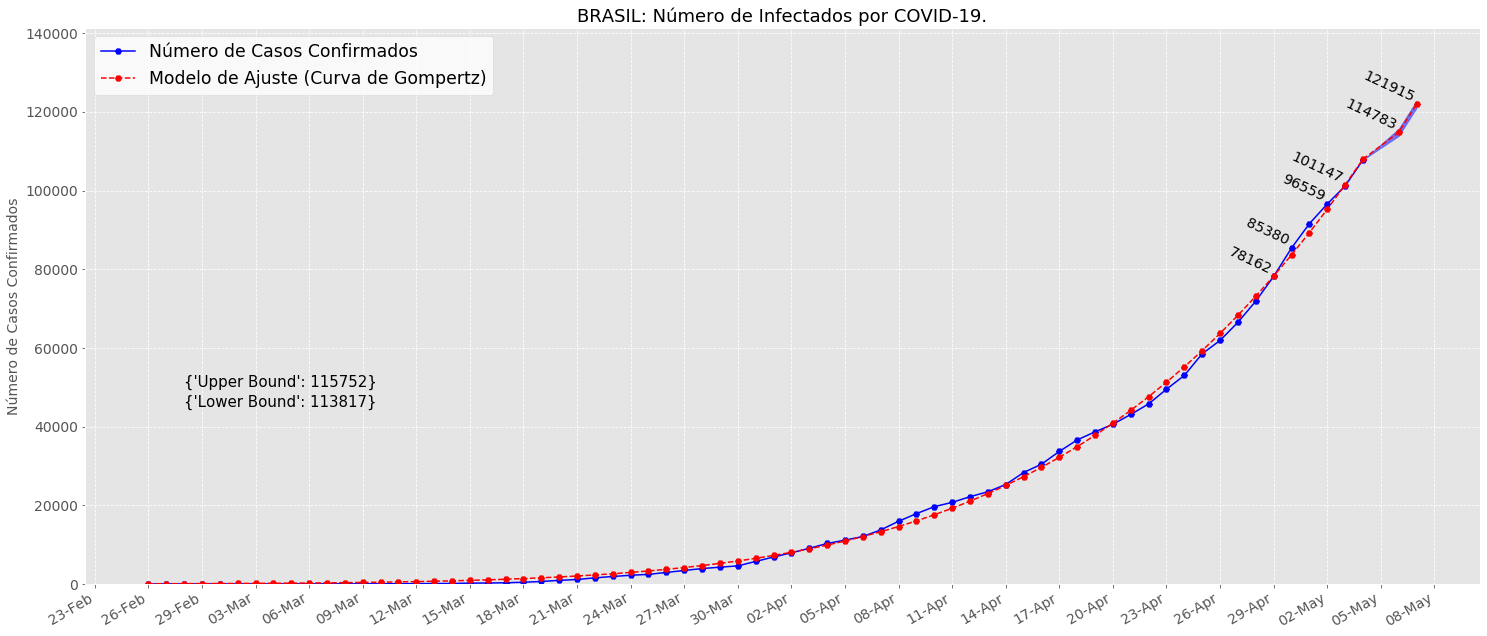

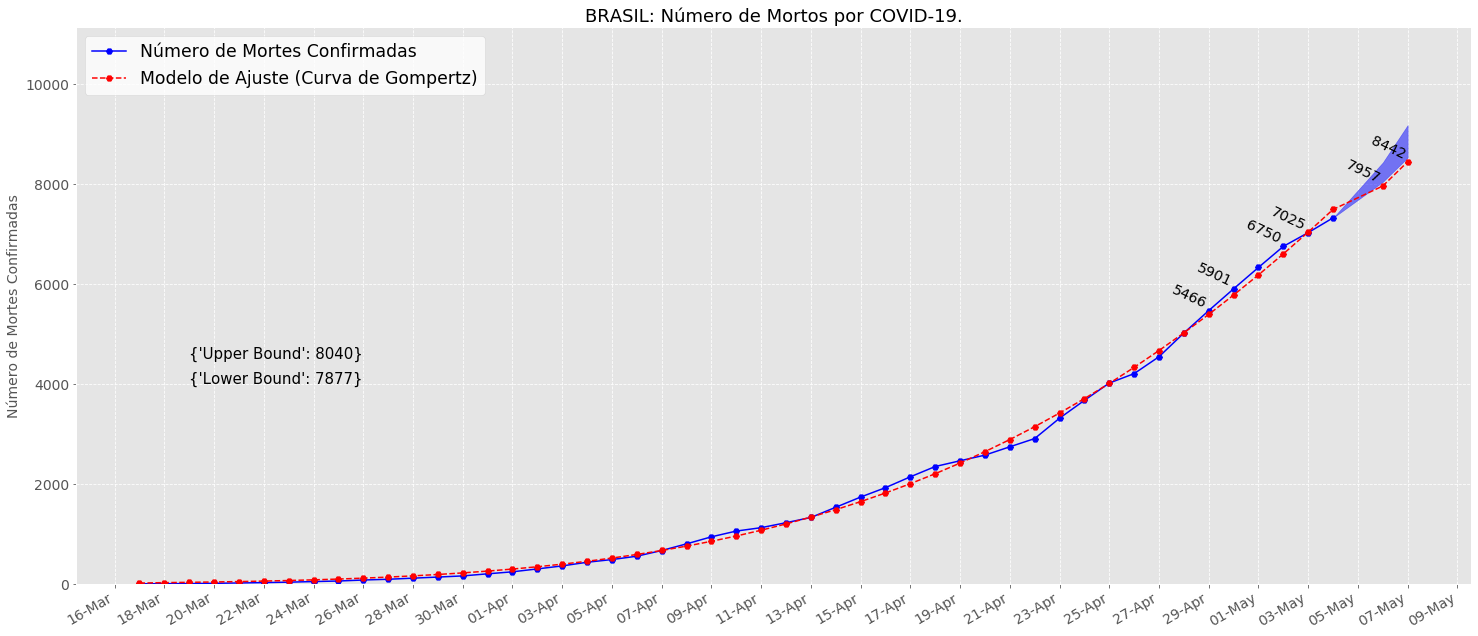

In [174]:
graph_model_BR(2)

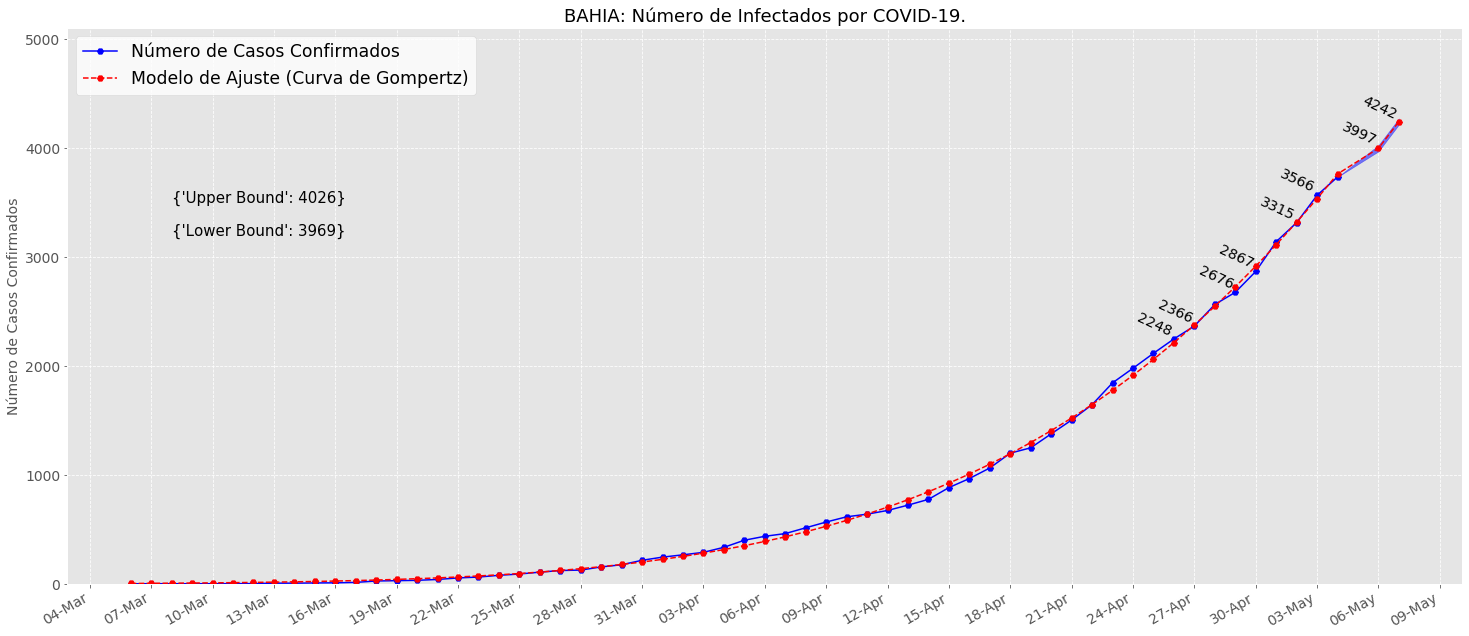

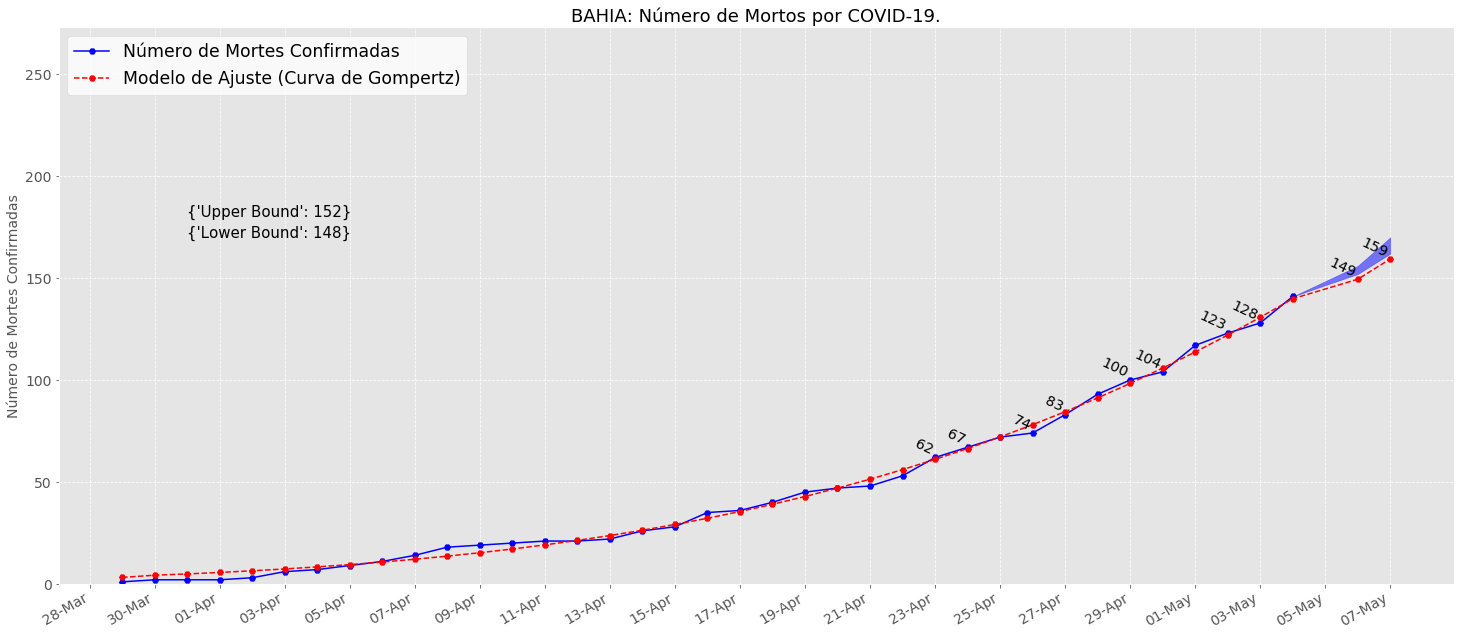

In [141]:
graph_model_BA(2)

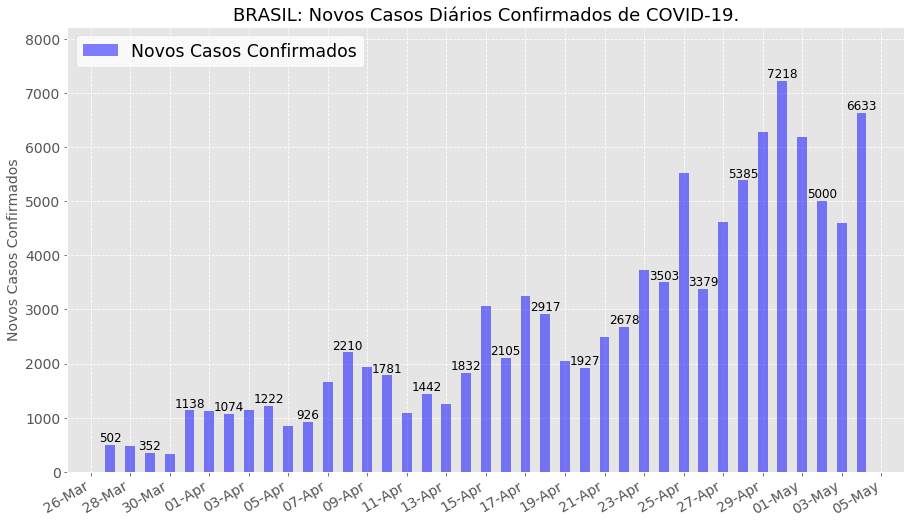

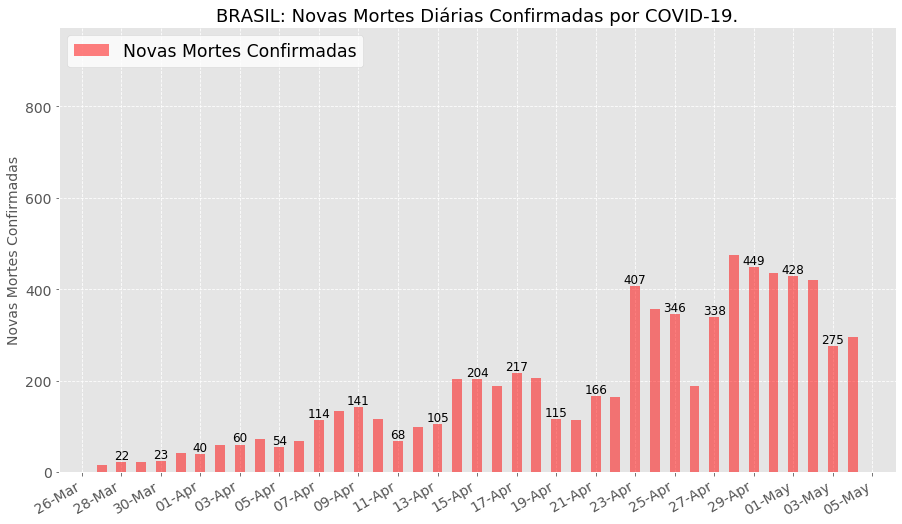

In [110]:
graph_vertical_bar_BR()

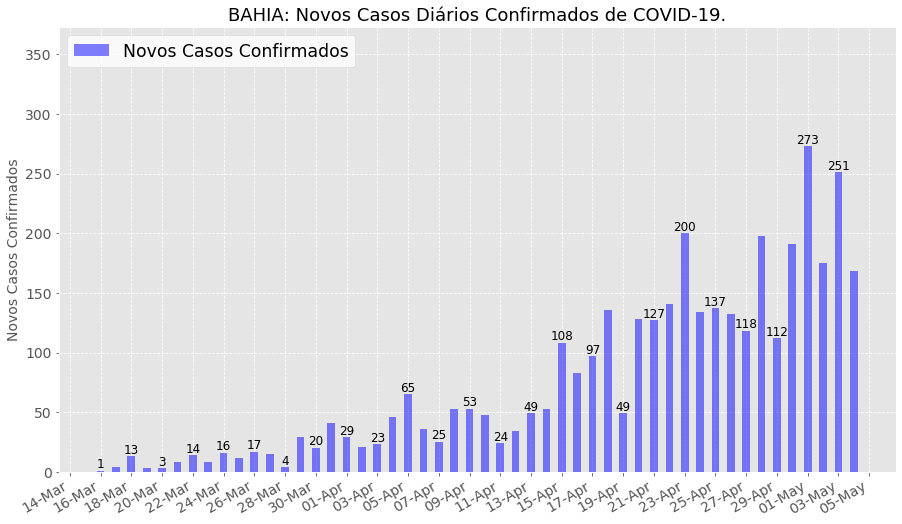

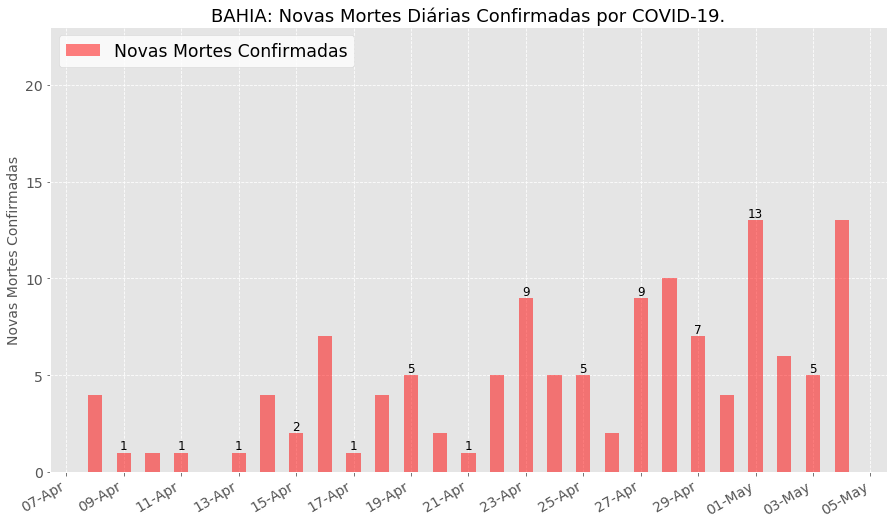

In [111]:
graph_vertical_bar_BA()

In [112]:
rmse_cases_BR,rmse_morte_BR = statistics_models_BR(1)

 RMSE_C1 = 1997.615	R²_C1 = 0.9953
 RMSE_C2 = 987.118	R²_C2 = 0.9989
 RMSE_M1 = 205.433	R²_M1 = 0.9911
 RMSE_M2 = 82.967	R²_M2 = 0.9985


In [113]:
rmse_cases_BA,rmse_morte_BA = statistics_models_BA(1)

 RMSE_C1 = 76.282	R²_C1 = 0.9947
 RMSE_C2 = 29.073	R²_C2 = 0.9992
 RMSE_M1 = 3.632	R²_M1 = 0.9919
 RMSE_M2 = 2.229	R²_M2 = 0.9969
